<a href="https://colab.research.google.com/github/M-Mag25/Hamoye-StageA-Project/blob/main/Lesson_2%2C_Stage_E_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'Passengers')

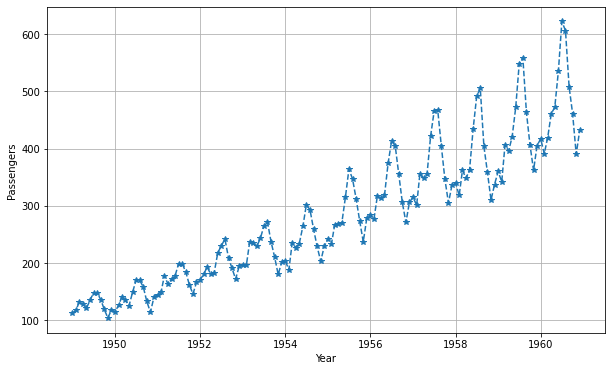

In [64]:
#LESSON 2 WRANGLING TIME SERIES DATA 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv" )
df[ "Month" ] = pd.to_datetime(df[ "Month" ]) #convert column to datetime
df.set_index( "Month" , inplace= True )
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.index, df.Passengers, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' )

In [65]:
df.shape
df.describe

<bound method NDFrame.describe of             Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]>

In [66]:
#check for missing values
df.isnull().values.any()
#There are no missing values in our dataset however, in bid to explain how we handle

False

In [67]:
#missing values, we will make a copy of our dataset and delete some values at random.
df_copy = df.copy()
rows = df_copy.sample(frac= 0.1 , random_state= 0 )
rows[ 'Passengers' ] = np.nan
df_copy.loc[rows.index, 'Passengers' ] = rows[ 'Passengers' ]
df_copy.isnull().sum()
#There are now 14 missing values in the dataset

Passengers    14
dtype: int64

In [68]:
#Filling missing data by imputation - Forward fill
df_copy_ffill = df_copy.fillna(method= 'ffill' )
df_copy_ffill.isnull().sum() 


Passengers    0
dtype: int64

In [69]:
#Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method= 'bfill' )
df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

In [70]:
#Filling missing data by interpolation
df_copy_LIF = df_copy.interpolate(method= 'linear' , limit_direction= 'forward' )
df_copy_LIF.isnull().sum()
df_copy_LIB = df_copy.interpolate(method= 'linear' , limit_direction= 'backward' )
df_copy_LIB.isnull().sum() 


Passengers    0
dtype: int64

            Passengers
Month                 
1949-01-31  112.000000
1949-04-30  126.333333
1949-07-31  134.666667
1949-10-31  134.333333
1950-01-31  112.333333
1950-04-30  134.000000
1950-07-31  148.000000
1950-10-31  153.666667
1951-01-31  133.000000
1951-04-30  163.666667
1951-07-31  183.000000
1951-10-31  181.666667
1952-01-31  161.000000
1952-04-30  184.666667
1952-07-31  210.333333
1952-10-31  214.000000
1953-01-31  187.333333
1953-04-30  222.333333
1953-07-31  245.333333
1953-10-31  240.000000
1954-01-31  195.000000
1954-04-30  216.666667
1954-07-31  266.666667
1954-10-31  260.333333
1955-01-31  224.666667
1955-04-30  256.333333
1955-07-31  316.333333
1955-10-31  311.000000
1956-01-31  266.333333
1956-04-30  302.333333
1956-07-31  368.333333
1956-10-31  355.333333
1957-01-31  297.333333
1957-04-30  335.000000
1957-07-31  414.000000
1957-10-31  406.000000
1958-01-31  327.000000
1958-04-30  342.666667
1958-07-31  429.666667
1958-10-31  422.666667
1959-01-31  335.666667
1959-04-30 

Text(0, 0.5, 'Passengers')

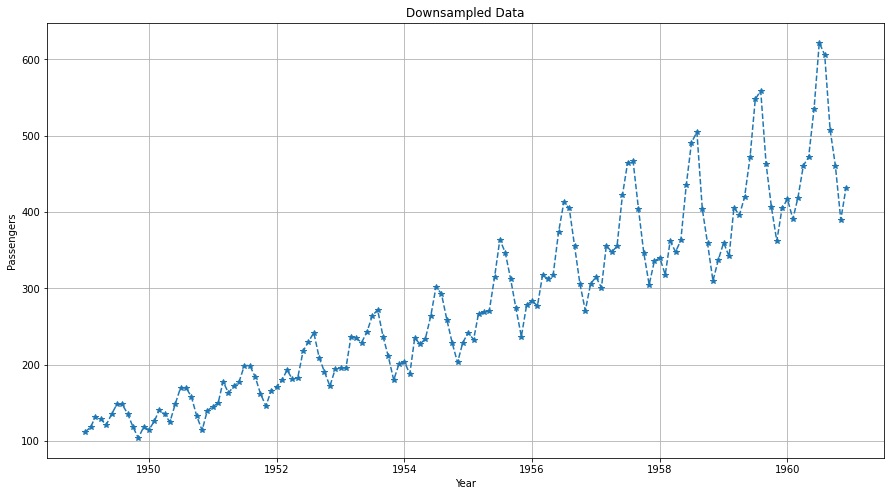

In [133]:
#Downsampling and Upsampling
#Downsample to quarterly data points
df_quarterly = df.resample( '3M' ).mean() 
df_quarterly.describe
print(df_quarterly)
df_log = np.log(df_quarterly)
df_index = df_log.diff(periods= 0 )
plt.plot(df.index, df.Passengers, '--' , marker= '*' , )
plt.title('Downsampled Data')
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' )


            Passengers
Month                 
1949-01-01       112.0
1949-01-02         NaN
1949-01-03         NaN
1949-01-04         NaN
1949-01-05         NaN
...                ...
1960-11-27         NaN
1960-11-28         NaN
1960-11-29         NaN
1960-11-30         NaN
1960-12-01       432.0

[4353 rows x 1 columns]


Text(0, 0.5, 'Passengers')

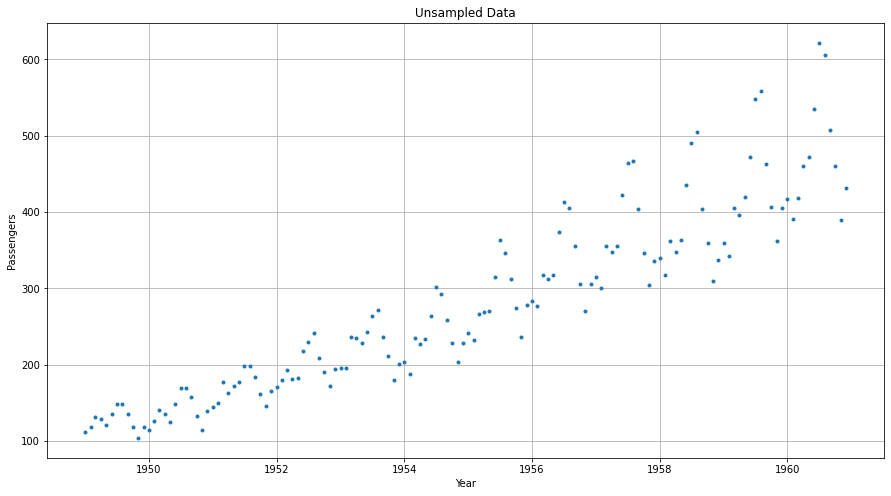

In [130]:
#Upsample to daily data points
#Upsample to daily data points
df_daily = df.resample( 'D' ).mean() 
df_daily.describe
print(df_daily)
df_log = np.log(df_daily)
df_index = df_log.diff(periods= 1 )
plt.plot(df.index, df.Passengers, '.' , marker= '.' , )
plt.title('Unsampled Data')
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' )

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: Passengers, Length: 144, dtype: float64


Text(0, 0.5, 'Passengers')

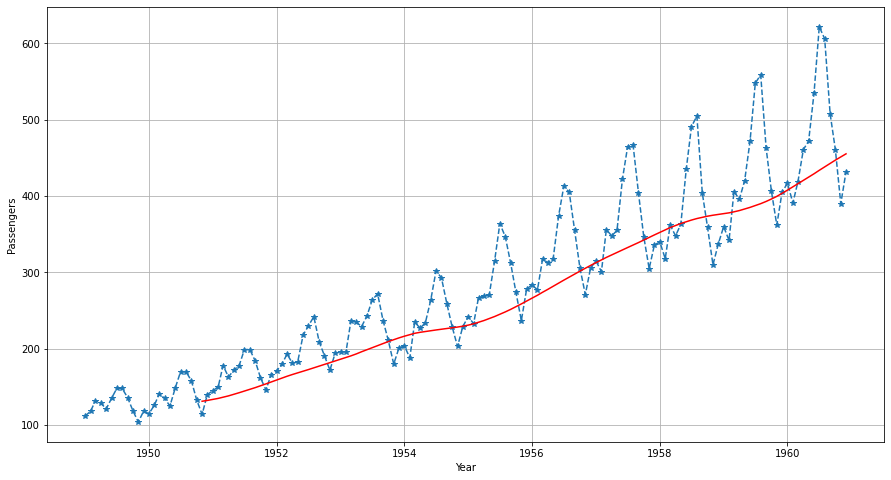

In [125]:
df_MA = df.copy()
MA = df_MA[ 'Passengers' ].rolling( 12 ).mean()
MA.describe
print(MA)
df_log = np.log(MA)
df_index = df_log.diff(periods= 1 )
plt.plot(df.index, df.Passengers, '--' , marker= '*' , )
plt.plot(MA.rolling( 12 ).mean(), color= 'red' )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' )

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


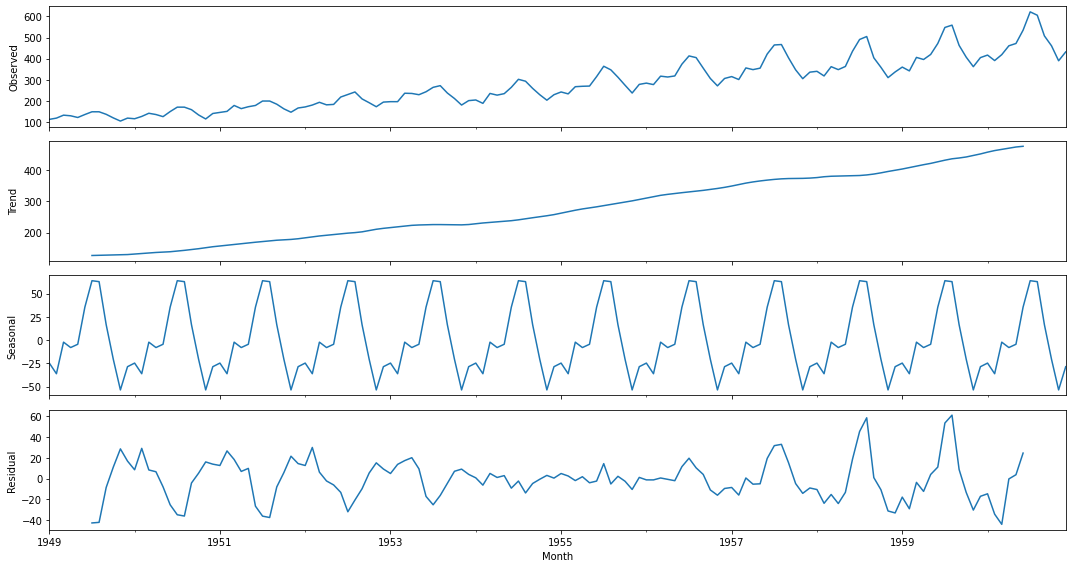

In [84]:
#Time Series Specific Exploratory Methods
import statsmodels.api as sm
from pylab import rcParams
rcParams[ 'figure.figsize' ] = 15 , 8
decompose_series = sm.tsa.seasonal_decompose(df[ 'Passengers' ], model= 'additive' )
decompose_series.plot()
plt.show() 
#The decomposed time series show an obvious increasing trend and seasonality variations.
#Recall that we have initially plotted the moving average on the last 12 months which showed that it varies with time. This suggests that the data is not stationary. We will now performan ADF test to confirm this speculation


In [108]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df[ 'Passengers' ])
print( f"ADF Statistic: {adf_result[ 0 ]} ")
print( f"p-value: {adf_result[ 1 ]} " )
print( f"No. of lags used: {adf_result[ 2 ]} " )
print( f"No. of observations used : {adf_result[ 3 ]} " )
print( "Critical Values:" )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )
#From the results obtained, the p-value is greater than the critical value at a 5% significance level and, the ADF statistic is greater that any of the critical values obtain.This confirms that the series is indeed non-stationary. 




ADF Statistic: 0.8153688792060418 
p-value: 0.9918802434376409 
No. of lags used: 13 
No. of observations used : 130 
Critical Values:
 1% : -3.4816817173418295 
 5% : -2.8840418343195267 
 10% : -2.578770059171598 


Text(0.5, 1.0, 'Differenced Data')

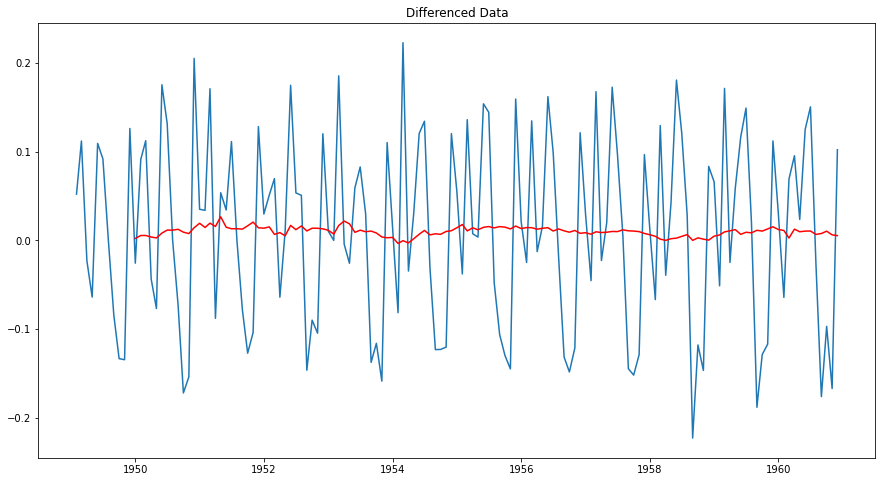

In [134]:
#Convert time series to stationary by removing trend and seasonality
#Transformation and Differencing
df_log = np.log(df)
df_diff = df_log.diff(periods= 1 )
plt.plot(df_diff.index, df_diff.Passengers, '-' )
plt.plot(df_diff.rolling( 12 ).mean(), color= 'red' )
plt.title('Differenced Data')